Let's build Logistic Regression from Scratch by implementing:
✅ Sigmoid Function
✅ Cost Function (Log Loss)
✅ Gradient Descent Optimization
✅ Model Training & Prediction

We will use NumPy for numerical computations and Pandas for data handling. 🚀



Step 1: Install Dependencies & Import Libraries


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


** Step 2: Load dataset**

In [33]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

# Display first few rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  ...   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35  ...  33.6                     0.627   50        1
1            1       85             66             29  ...  26.6                     0.351   31        0
2            8      183             64              0  ...  23.3                     0.672   32        1
3            1       89             66             23  ...  28.1                     0.167   21        0
4            0      137             40             35  ...  43.1                     2.288   33        1

[5 rows x 9 columns]



📌 Step 3: Preprocess Data


In [34]:
# Replace zero values with NaN for selected columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)


In [35]:
# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)



In [36]:
# Split data into X (features) and y (target)
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values



In [37]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [38]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📌 Step 4: Implement Logistic Regression from Scratch

We will implement:
✔ Sigmoid Function
✔ Cost Function
✔ Gradient Descent
✔ Prediction Function

In [39]:
#sigmoid function
def sigmoid(z): # The function should take 'z' as input
  return 1 / (1 + np.exp(-z)) # Use 'z' in the calculation, not 'x'

In [40]:
#Compute Cost Function (Log Loss)

def compute_cost(X, y, w, b):
  m = X.shape[0]
  z = np.dot(X, w) + b
  predictions = sigmoid(z)
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
  return loss

In [41]:
#Implement Gradient Descent
def gradient_descent(X, y, w, b, alpha, epochs):
    m = X.shape[0]  # Number of samples
    cost_history = []  # Track cost function values over iterations

    for i in range(epochs):
        z = np.dot(X, w) + b  # Compute linear combination (z = Xw + b)
        predictions = sigmoid(z)  # Apply sigmoid function to get probabilities

        # Compute gradients (partial derivatives)
        dw = (1 / m) * np.dot(X.T, (predictions - y))  # Gradient of weights
        db = (1 / m) * np.sum(predictions - y)  # Gradient of bias

        # Update parameters using gradients
        w -= alpha * dw  # Update weights
        b -= alpha * db  # Update bias

        # Compute and store cost function value
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:  # Print cost every 100 iterations
            print(f'Epoch {i}: Cost = {cost:.4f}')

    return w, b, cost_history  # Return optimized weights, bias, and cost history



In [42]:
# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0

# Train the model using gradient descent
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, epochs)


Epoch 0: Cost = 0.6915
Epoch 100: Cost = 0.5881
Epoch 200: Cost = 0.5427
Epoch 300: Cost = 0.5187
Epoch 400: Cost = 0.5041
Epoch 500: Cost = 0.4945
Epoch 600: Cost = 0.4877
Epoch 700: Cost = 0.4828
Epoch 800: Cost = 0.4790
Epoch 900: Cost = 0.4761


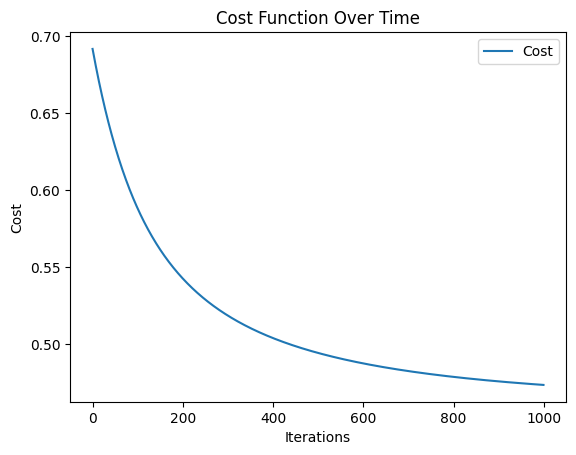

In [43]:
plt.plot(range(epochs), cost_history, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Time")
plt.legend()
plt.show()


In [44]:
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

# Make predictions
y_pred = predict(X_test, w, b)


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



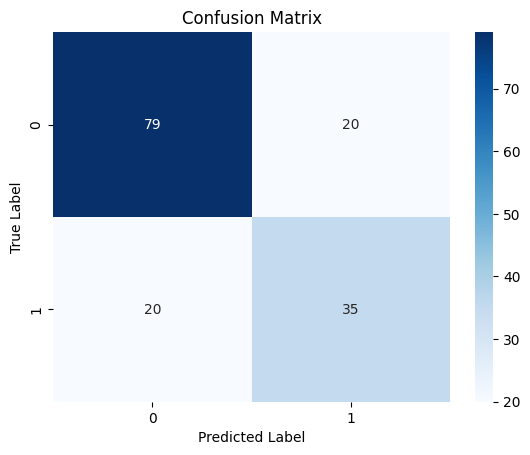

In [45]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
